# Using 7 training trials & 10 test trials

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,precision_recall_fscore_support as score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import warnings
%matplotlib inline

# Reading the Dataset.

In [2]:
df_1 = pd.read_excel('Subject 1 Session 1 Train Trial 1.xlsx', header=None)
df_2 = pd.read_excel('Subject 1 Session 1 Train Trial 2.xlsx', header=None)
df_3 = pd.read_excel('Subject 1 Session 1 Train Trial 3.xlsx', header=None)
df_4 = pd.read_excel('Subject 1 Session 1 Train Trial 4.xlsx', header=None)
df_5 = pd.read_excel('Subject 1 Session 1 Train Trial 5.xlsx', header=None)
df_6 = pd.read_excel('Subject 1 Session 1 Train Trial 6.xlsx', header=None)
df_7 = pd.read_excel('Subject 1 Session 1 Train Trial 7.xlsx', header=None)
df_11 = pd.read_excel('Subject 1 Session 1 Test Trial 1.xlsx', header=None)
df_12 = pd.read_excel('Subject 1 Session 1 Test Trial 2.xlsx', header=None)
df_13 = pd.read_excel('Subject 1 Session 1 Test Trial 3.xlsx', header=None)
df_14 = pd.read_excel('Subject 1 Session 1 Test Trial 4.xlsx', header=None)
df_15 = pd.read_excel('Subject 1 Session 1 Test Trial 5.xlsx', header=None)
df_16 = pd.read_excel('Subject 1 Session 1 Test Trial 6.xlsx', header=None)
df_17 = pd.read_excel('Subject 1 Session 1 Test Trial 7.xlsx', header=None)
df_18 = pd.read_excel('Subject 1 Session 1 Test Trial 8.xlsx', header=None)
df_19 = pd.read_excel('Subject 1 Session 1 Test Trial 9.xlsx', header=None)
df_20 = pd.read_excel('Subject 1 Session 1 Test Trial 10.xlsx', header=None)

# Cleaning the Dataset.

In [3]:
df1 = df_1[(df_1.iloc[:,64])==-1].index # df1 contains all the rows (index) that contain a -1 in the 65th column (column[64])
df_1.drop(df1, inplace=True) # drops df1 from df_1
batch1_clean = df_1

df2 = df_2[(df_2.iloc[:,64])==-1].index # df2 contains all the rows (index) that contain a -1 in the 65th column (column[64])
df_2.drop(df2, inplace=True) # drops df2 from df_2
batch2_clean = df_2

df3 = df_3[(df_3.iloc[:,64])==-1].index # df3 contains all the rows (index) that contain a -1 in the 65th column (column[64])
df_3.drop(df3, inplace=True) # drops df3 from df_3
batch3_clean = df_3

df4 = df_4[(df_4.iloc[:,64])==-1].index # df4 contains all the rows (index) that contain a -1 in the 65th column (column[64])
df_4.drop(df4, inplace=True) # drops df4 from df_4
batch4_clean = df_4

df5 = df_5[(df_5.iloc[:,64])==-1].index # df5 contains all the rows (index) that contain a -1 in the 65th column (column[64])
df_5.drop(df5, inplace=True) # drops df5 from df_5
batch5_clean = df_5

df6 = df_6[(df_6.iloc[:,64])==-1].index # df6 contains all the rows (index) that contain a -1 in the 65th column (column[64])
df_6.drop(df6, inplace=True) # drops df6 from df_6
batch6_clean = df_6

df7 = df_7[(df_7.iloc[:,64])==-1].index # df7 contains all the rows (index) that contain a -1 in the 65th column (column[64])
df_7.drop(df7, inplace=True) # drops df7 from df_7
batch7_clean = df_7

df11 = df_11[(df_11.iloc[:,64])==-1].index # df11 contains all the rows (index) that contain a -1 in the 65th column
df_11.drop(df11, inplace=True) # drops df11 from df_11
batch11_clean = df_11

df12 = df_12[(df_12.iloc[:,64])==-1].index # df12 contains all the rows (index) that contain a -1 in the 65th column
df_12.drop(df12, inplace=True) # drops df12 from df_12
batch12_clean = df_12

df13 = df_13[(df_13.iloc[:,64])==-1].index # df13 contains all the rows (index) that contain a -1 in the 65th column
df_13.drop(df13, inplace=True) # drops df13 from df_13
batch13_clean = df_13

df14 = df_14[(df_14.iloc[:,64])==-1].index # df14 contains all the rows (index) that contain a -1 in the 65th column
df_14.drop(df14, inplace=True) # drops df14 from df_14
batch14_clean = df_14

df15 = df_15[(df_15.iloc[:,64])==-1].index # df15 contains all the rows (index) that contain a -1 in the 65th column
df_15.drop(df15, inplace=True) # drops df15 from df_15
batch15_clean = df_15

df16 = df_16[(df_16.iloc[:,64])==-1].index # df16 contains all the rows (index) that contain a -1 in the 65th column
df_16.drop(df16, inplace=True) # drops df16 from df_16
batch16_clean = df_16

df17 = df_17[(df_17.iloc[:,64])==-1].index # df17 contains all the rows (index) that contain a -1 in the 65th column
df_17.drop(df17, inplace=True) # drops df17 from df_17
batch17_clean = df_17

df18 = df_18[(df_18.iloc[:,64])==-1].index # df6 contains all the rows (index) that contain a -1 in the 65th column
df_18.drop(df18, inplace=True) # drops df18 from df_18
batch18_clean = df_18

df19 = df_19[(df_19.iloc[:,64])==-1].index # df19 contains all the rows (index) that contain a -1 in the 65th column
df_19.drop(df19, inplace=True) # drops df19 from df_19
batch19_clean = df_19

df20 = df_20[(df_20.iloc[:,64])==-1].index # df20 contains all the rows (index) that contain a -1 in the 65th column
df_20.drop(df20, inplace=True) # drops df20 from df_20
batch20_clean = df_20

# Splitting the Dataset.

In [4]:
First_Model_Train = [batch1_clean, batch2_clean, batch3_clean, batch4_clean, batch5_clean, batch6_clean, batch7_clean]
Train = pd.concat(First_Model_Train)

First_Model_Test = [batch11_clean, batch12_clean, batch13_clean, batch14_clean, batch15_clean,
                     batch16_clean, batch17_clean, batch18_clean, batch19_clean, batch20_clean]
Test = pd.concat(First_Model_Test)

In [5]:
X_train = Train[Train.columns[:64]]
y_train = Train[Train.columns[64:]]

X_test = Test[Test.columns[:64]]
y_test = Test[Test.columns[64:]]

# Standardizing all the Features.

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest.

# Using GridsearchCV to get the best Hyperparameters for Random Forest.

In [9]:
#takes about 5 minutes.
warnings.simplefilter('ignore') #hides the warnings.

RF = RandomForestClassifier(random_state = 42) # Random Forest classifier

RF_parameters = {'criterion': ['entropy','gini'],  # searching for the best parameters using
                 'n_estimators': [20,25,30,35,40], # gridsearchCV with 5 fold cross validation.
                 'bootstrap': [True, False]}

gcv_RF = GridSearchCV(estimator = RF,
                       param_grid = RF_parameters,
                       scoring = 'accuracy',
                       cv = 5,               # k-fold
                       n_jobs = -1,          # using all processors
                       return_train_score=True)   

gcv_RF = gcv_RF.fit(X_train, y_train)

gcv_RF_results = gcv_RF.cv_results_ # results from all the models.

gcv_RF_Train_Accuracy = (gcv_RF.best_score_)*100 # Accuracy of the best model.
gcv_RF_Train_Accuracy = round(gcv_RF_Train_Accuracy,4)

gcv_RF_parameters = gcv_RF.best_params_ # Hyperparameters associated to the best model

print(f'Best Training Accuracy is {gcv_RF_Train_Accuracy}% for {gcv_RF_parameters} as hyperparameter.')

Best Training Accuracy is 98.6033% for {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 25} as hyperparameter.


In [11]:
gcv_RF_parameters

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 25}

# Trying models with different numbers of Trees with best Hyperparameters of Random Forest.

In [12]:
#takes about 3 minutes.
warnings.simplefilter('ignore') #hides the warning

RF_n_est_Error_array = []
n_estimators = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100] # numbers of Trees

for n in n_estimators:
    # Random Forest with n Trees
    RF = RandomForestClassifier(random_state = 42, n_estimators = n,
                                criterion = gcv_RF_parameters['criterion'], bootstrap = gcv_RF_parameters['bootstrap'])
    
    RF.fit(X_train, y_train)
    
    RF_y_pred = RF.predict(X_test)
    
    # Test Accuracy for n Trees
    RF_Test_Accuracy = (accuracy_score(y_test, RF_y_pred))*100
    RF_Test_Accuracy = round(RF_Test_Accuracy,4)
    
    # Test Error for n Trees
    RF_Test_Error = 100 - RF_Test_Accuracy
    RF_Test_Error = round(RF_Test_Error,4)
    RF_n_est_Error_array.append(RF_Test_Error)
    
    # printing Test Accuracy for n Trees
    print(f'Test Accuracy for {n} trees is {RF_Test_Accuracy}%.')

# getting the index of the lowest error from the error array
idx_3 = RF_n_est_Error_array.index(min(RF_n_est_Error_array))
print (f'Lowest Error is {min(RF_n_est_Error_array)}% for {n_estimators[idx_3]} Trees')

Test Accuracy for 5 trees is 94.3968%.
Test Accuracy for 10 trees is 95.5919%.
Test Accuracy for 15 trees is 96.052%.
Test Accuracy for 20 trees is 96.4515%.
Test Accuracy for 25 trees is 95.5172%.
Test Accuracy for 30 trees is 96.0373%.
Test Accuracy for 35 trees is 95.99%.
Test Accuracy for 40 trees is 95.9206%.
Test Accuracy for 45 trees is 95.6632%.
Test Accuracy for 50 trees is 95.6405%.
Test Accuracy for 55 trees is 95.7986%.
Test Accuracy for 60 trees is 95.8833%.
Test Accuracy for 65 trees is 95.6105%.
Test Accuracy for 70 trees is 95.9306%.
Test Accuracy for 75 trees is 95.8359%.
Test Accuracy for 80 trees is 95.8986%.
Test Accuracy for 85 trees is 96.1014%.
Test Accuracy for 90 trees is 96.0413%.
Test Accuracy for 95 trees is 96.0967%.
Test Accuracy for 100 trees is 96.086%.
Lowest Error is 3.5485% for 20 Trees


# Plotting Numbers of Trees vr. Test Error for Random Forest.

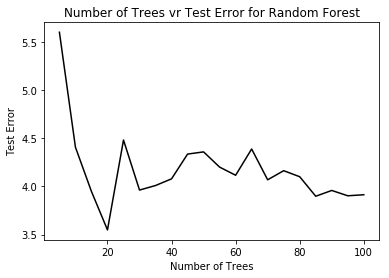

In [13]:
plt.plot(n_estimators, RF_n_est_Error_array, color ="k")

plt.title('Number of Trees vr Test Error for Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Test Error')
plt.show()

# Taking Best Hyperparameters and best Numbers of Trees for Random Forest.

In [14]:
# training again with the best number of Trees
RF_Best_n = RandomForestClassifier(random_state = 42, n_estimators = n_estimators[idx_3],
                                   criterion = gcv_RF_parameters['criterion'], bootstrap = gcv_RF_parameters['bootstrap'])
RF_Best_n.fit(X_train, y_train)

RF_Best_n_y_pred = RF_Best_n.predict(X_test)

# Test Accuracy for best numbers of Trees
RF_Best_n_Test_Accuracy = (accuracy_score(y_test, RF_Best_n_y_pred))*100
RF_Best_n_Test_Accuracy = round(RF_Best_n_Test_Accuracy,4)

# Test Error for best numbers of Trees
RF_Best_n_Test_Error = 100 - RF_Best_n_Test_Accuracy
RF_Best_n_Test_Error = round(RF_Best_n_Test_Error,4)

print (f'Test Accuracy for the best model from GridsearchCV and with best numbers of trees is {RF_Best_n_Test_Accuracy}%..')

Test Accuracy for the best model from GridsearchCV and with best numbers of trees is 96.4515%..


# Classification Report

In [15]:
print(classification_report(y_test, RF_Best_n_y_pred, labels=[0,1, 2, 3, 4]))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     29990
           1       0.98      0.94      0.96     29990
           2       0.97      0.96      0.97     29990
           3       0.93      0.98      0.95     29990
           4       0.94      0.98      0.96     29990

   micro avg       0.96      0.96      0.96    149950
   macro avg       0.97      0.96      0.96    149950
weighted avg       0.97      0.96      0.96    149950



# Presision, Recall, Accuracy, Confusion Matrix and ROC Curve for Random Forest.

In [16]:
precision,recall,fscore,support = score(y_test, RF_Best_n_y_pred, average = 'weighted')
print(f'Precision : {(round(precision,4))*100}% / Recall : {(round(recall,4))*100}% / Accuracy : {RF_Best_n_Test_Accuracy}%')

Precision : 96.54% / Recall : 96.45% / Accuracy : 96.4515%


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, RF_Best_n_y_pred)

array([[29161,     0,   276,   117,   436],
       [   19, 28082,     0,  1889,     0],
       [    0,    19, 28802,     0,  1169],
       [    0,   497,     0, 29299,   194],
       [   19,     0,   472,   214, 29285]], dtype=int64)

# Applying PCA to the Best model from GridSearchCV of Random Forest.

In [18]:
#time for this cell depends on the numbers of trees we get from above 
#took about 3 minutes when number of trees was 65

warnings.simplefilter('ignore') # hides the warnings

#n_components = [1,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,80,84,88,92,96,100] # number of Principal Components
n_components = [1,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64]
RF_PCA_Error_Array = []

for n in n_components:
    # PCA with n principal components
    pca = PCA(n_components = n)
    
    # n principal components
    X_train_PCA_RF = pca.fit_transform(X_train)
    X_test_PCA_RF = pca.transform(X_test)
    
    # applying best bodel with n principal component
    RF_PCA = RandomForestClassifier(random_state = 42, n_estimators = n_estimators[idx_3],
                                    criterion = gcv_RF_parameters['criterion'], bootstrap = gcv_RF_parameters['bootstrap'])
    RF_PCA.fit(X_train_PCA_RF, y_train)
    
    # predicting the class with n principal components
    y_pred_PCA_RF = RF_PCA.predict(X_test_PCA_RF)
    
    # Test Accuracy of the best gridsearchcv model with n principal components
    PCA_RF_Test_Accuracy = (accuracy_score(y_test, y_pred_PCA_RF))*100
    PCA_RF_Test_Accuracy = round(PCA_RF_Test_Accuracy,4)
    
    # Test Error of the best gridsearchcv model with n principal components
    PCA_RF_Test_Error = 100 - PCA_RF_Test_Accuracy
    PCA_RF_Test_Error = round(PCA_RF_Test_Error,4)
    RF_PCA_Error_Array.append(PCA_RF_Test_Error)
    
    # printing accuracy for n principal components    
    print(f'Test Accuracy of the Model with {n} Principal Components is {PCA_RF_Test_Accuracy}%.')

# gettint the index of the lowest error from the error array
idx_4 = RF_PCA_Error_Array.index(min(RF_PCA_Error_Array))
print (f'Lowest Error is {min(RF_PCA_Error_Array)} % for {n_components[idx_4]} Principal Components.')

Test Accuracy of the Model with 1 Principal Components is 50.6882%.
Test Accuracy of the Model with 4 Principal Components is 92.8503%.
Test Accuracy of the Model with 8 Principal Components is 92.933%.
Test Accuracy of the Model with 12 Principal Components is 95.3158%.
Test Accuracy of the Model with 16 Principal Components is 93.4785%.
Test Accuracy of the Model with 20 Principal Components is 94.5095%.
Test Accuracy of the Model with 24 Principal Components is 93.1264%.
Test Accuracy of the Model with 28 Principal Components is 94.9496%.
Test Accuracy of the Model with 32 Principal Components is 95.8993%.
Test Accuracy of the Model with 36 Principal Components is 94.1534%.
Test Accuracy of the Model with 40 Principal Components is 92.8503%.
Test Accuracy of the Model with 44 Principal Components is 95.8026%.
Test Accuracy of the Model with 48 Principal Components is 94.0233%.
Test Accuracy of the Model with 52 Principal Components is 95.5172%.
Test Accuracy of the Model with 56 Pri

# Plotting Number of Components vr. Test Error for Random Forest.

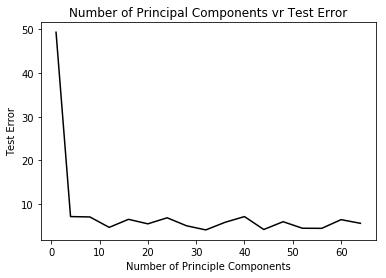

In [19]:
plt.plot(n_components, RF_PCA_Error_Array, color ="k")

plt.title('Number of Principal Components vr Test Error')
plt.xlabel('Number of Principle Components')
plt.ylabel('Test Error')
plt.show()

# Model with best Number of Principal Components and best Hyperparameters for Random Forest.

In [20]:
# PCA with best numbers of principal components.
best_pca = PCA(n_components = n_components[idx_4])

# Transforming the features
X_train_Best_PCA_RF = best_pca.fit_transform(X_train)
X_test_Best_PCA_RF = best_pca.transform(X_test)

# applying best bodel with best numbers of principal components
RF_Best_PCA = RandomForestClassifier(random_state = 42, n_estimators = n_estimators[idx_3],
                                     criterion = gcv_RF_parameters['criterion'], bootstrap = gcv_RF_parameters['bootstrap'])
RF_Best_PCA.fit(X_train_Best_PCA_RF, y_train)

# predicting the class with best numbers of principal components
y_pred_RF_Best_PCA = RF_Best_PCA.predict(X_test_Best_PCA_RF)

# Test Accuracy of the best gridsearchcv model with best numbers of principal components
Best_PCA_Test_Accuracy = (accuracy_score(y_test, y_pred_RF_Best_PCA))*100
Best_PCA_Test_Accuracy = round(Best_PCA_Test_Accuracy,4)

# Test Error of the best gridsearchcv model with best numbers of principal components
Best_PCA_Test_Error = 100 - Best_PCA_Test_Accuracy
Best_PCA_Test_Error =round(Best_PCA_Test_Error,4)

# printing accuracy for best numbers of principal components.
print(f'Test accuracy of the Model with {n_components[idx_4]} Principal Components is {Best_PCA_Test_Accuracy}%.') 

Test accuracy of the Model with 32 Principal Components is 95.5132%.


# Classification Report

In [21]:
print(classification_report(y_test, y_pred_RF_Best_PCA, labels=[0,1, 2, 3, 4]))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     29990
           1       1.00      0.95      0.97     29990
           2       0.91      0.98      0.94     29990
           3       0.97      1.00      0.98     29990
           4       0.98      0.88      0.93     29990

   micro avg       0.96      0.96      0.96    149950
   macro avg       0.96      0.96      0.95    149950
weighted avg       0.96      0.96      0.95    149950



# Presision, Recall, Accuracy, Confusion Matrix and ROC Curve for the above model.

In [22]:
precision,recall,fscore,support = score(y_test, y_pred_RF_Best_PCA, average = 'weighted')
print(f'Precision : {(round(precision,4))*100}% / Recall : {(round(recall,4))*100}% / Accuracy : {Best_PCA_Test_Accuracy}%.')

Precision : 95.71% / Recall : 95.50999999999999% / Accuracy : 95.5132%.


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_RF_Best_PCA)

array([[29338,     0,   255,   397,     0],
       [ 1350, 28383,     5,   103,   149],
       [    0,    31, 29264,   378,   317],
       [    0,     0,     0, 29990,     0],
       [  985,     0,  2599,   159, 26247]], dtype=int64)